In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

Using TensorFlow backend.


In [0]:
import pickle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils

## Load DataSet

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

 35332096/170498071 [=====>........................] - ETA: 2:45

112222208/170498071 [==================>...........] - ETA: 1:22

170500096/170498071 [==============================] - 259s 2us/step


In [0]:
train_set_X = train_features
train_set_Y = train_labels
test_set_X = test_features
test_set_Y = test_labels

In [5]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [6]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [7]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Own Network Architecture

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_1'))

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_2'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_3'))

model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_4'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_5'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, activation = 'relu', name='dense_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_layer_4 (Conv2D)        (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pool_layer_2 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv_layer_5 (Conv2D)        (None, 3, 3, 128)         73856     
__________

## Training Model

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adamax',
              metrics=['accuracy'])

In [11]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 100,
          epochs = 100,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 290us/step - loss: 1.6893 - acc: 0.3916 - val_loss: 1.4350 - val_acc: 0.4702
Epoch 2/100
50000/50000 [==============================] - 12s 236us/step - loss: 1.3180 - acc: 0.5307 - val_loss: 1.2679 - val_acc: 0.5493
Epoch 3/100
13100/50000 [======>.......................] - ETA: 8s - loss: 1.1776 - acc: 0.5862

50000/50000 [==============================] - 12s 233us/step - loss: 1.1424 - acc: 0.5981 - val_loss: 1.1480 - val_acc: 0.5993
Epoch 4/100
50000/50000 [==============================] - 12s 233us/step - loss: 1.0222 - acc: 0.6414 - val_loss: 1.1007 - val_acc: 0.6172
Epoch 5/100
40800/50000 [=======================>......] - ETA: 1s - loss: 0.9248 - acc: 0.6771

50000/50000 [==============================] - 11s 230us/step - loss: 0.9248 - acc: 0.6767 - val_loss: 1.0530 - val_acc: 0.6351
Epoch 6/100
50000/50000 [==============================] - 12s 233us/step - loss: 0.8406 - acc: 0.7060 - val_loss: 1.0154 - val_acc: 0.6585
Epoch 7/100
45600/50000 [==========================>...] - ETA: 0s - loss: 0.7602 - acc: 0.7338

50000/50000 [==============================] - 12s 230us/step - loss: 0.7632 - acc: 0.7320 - val_loss: 0.9885 - val_acc: 0.6653
Epoch 8/100
50000/50000 [==============================] - 12s 232us/step - loss: 0.6899 - acc: 0.7569 - val_loss: 0.9525 - val_acc: 0.6802
Epoch 9/100
48900/50000 [============================>.] - ETA: 0s - loss: 0.6134 - acc: 0.7858

50000/50000 [==============================] - 12s 230us/step - loss: 0.6132 - acc: 0.7859 - val_loss: 1.0217 - val_acc: 0.6788
Epoch 10/100
50000/50000 [==============================] - 12s 231us/step - loss: 0.5478 - acc: 0.8067 - val_loss: 1.0289 - val_acc: 0.6847
Epoch 11/100
48300/50000 [===========================>..] - ETA: 0s - loss: 0.4890 - acc: 0.8285

50000/50000 [==============================] - 12s 231us/step - loss: 0.4901 - acc: 0.8283 - val_loss: 1.0609 - val_acc: 0.6805
Epoch 12/100
50000/50000 [==============================] - 12s 232us/step - loss: 0.4315 - acc: 0.8481 - val_loss: 1.1311 - val_acc: 0.6781
Epoch 13/100
48800/50000 [============================>.] - ETA: 0s - loss: 0.3756 - acc: 0.8693

50000/50000 [==============================] - 12s 231us/step - loss: 0.3782 - acc: 0.8688 - val_loss: 1.1169 - val_acc: 0.6844
Epoch 14/100
50000/50000 [==============================] - 12s 232us/step - loss: 0.3254 - acc: 0.8857 - val_loss: 1.2287 - val_acc: 0.6815
Epoch 15/100
48200/50000 [===========================>..] - ETA: 0s - loss: 0.2865 - acc: 0.8974

50000/50000 [==============================] - 12s 232us/step - loss: 0.2879 - acc: 0.8971 - val_loss: 1.2955 - val_acc: 0.6813
Epoch 16/100
50000/50000 [==============================] - 12s 231us/step - loss: 0.2438 - acc: 0.9137 - val_loss: 1.3535 - val_acc: 0.6824
Epoch 17/100
47200/50000 [===========================>..] - ETA: 0s - loss: 0.2192 - acc: 0.9216

50000/50000 [==============================] - 12s 232us/step - loss: 0.2221 - acc: 0.9208 - val_loss: 1.4828 - val_acc: 0.6762
Epoch 18/100
50000/50000 [==============================] - 12s 233us/step - loss: 0.1962 - acc: 0.9312 - val_loss: 1.5505 - val_acc: 0.6816
Epoch 19/100
47700/50000 [===========================>..] - ETA: 0s - loss: 0.1761 - acc: 0.9382

50000/50000 [==============================] - 12s 232us/step - loss: 0.1763 - acc: 0.9380 - val_loss: 1.6530 - val_acc: 0.6722
Epoch 20/100
50000/50000 [==============================] - 11s 230us/step - loss: 0.1555 - acc: 0.9457 - val_loss: 1.7637 - val_acc: 0.6746
Epoch 21/100
46900/50000 [===========================>..] - ETA: 0s - loss: 0.1361 - acc: 0.9527

50000/50000 [==============================] - 12s 233us/step - loss: 0.1366 - acc: 0.9524 - val_loss: 1.7695 - val_acc: 0.6692
Epoch 22/100
50000/50000 [==============================] - 12s 232us/step - loss: 0.1245 - acc: 0.9561 - val_loss: 1.8590 - val_acc: 0.6861
Epoch 23/100
46500/50000 [==========================>...] - ETA: 0s - loss: 0.1211 - acc: 0.9571

50000/50000 [==============================] - 12s 232us/step - loss: 0.1224 - acc: 0.9567 - val_loss: 1.7985 - val_acc: 0.6875
Epoch 24/100
50000/50000 [==============================] - 12s 233us/step - loss: 0.1201 - acc: 0.9577 - val_loss: 1.8944 - val_acc: 0.6865
Epoch 25/100
46600/50000 [==========================>...] - ETA: 0s - loss: 0.0976 - acc: 0.9661

50000/50000 [==============================] - 12s 231us/step - loss: 0.1014 - acc: 0.9650 - val_loss: 2.0555 - val_acc: 0.6756
Epoch 26/100
50000/50000 [==============================] - 12s 232us/step - loss: 0.1005 - acc: 0.9654 - val_loss: 2.0703 - val_acc: 0.6803
Epoch 27/100
46600/50000 [==========================>...] - ETA: 0s - loss: 0.0970 - acc: 0.9665

50000/50000 [==============================] - 12s 231us/step - loss: 0.0988 - acc: 0.9659 - val_loss: 2.0845 - val_acc: 0.6803
Epoch 28/100
50000/50000 [==============================] - 12s 231us/step - loss: 0.0864 - acc: 0.9704 - val_loss: 2.1633 - val_acc: 0.6728
Epoch 29/100
46600/50000 [==========================>...] - ETA: 0s - loss: 0.0914 - acc: 0.9680

50000/50000 [==============================] - 12s 233us/step - loss: 0.0929 - acc: 0.9676 - val_loss: 2.1424 - val_acc: 0.6778
Epoch 30/100
50000/50000 [==============================] - 12s 233us/step - loss: 0.0852 - acc: 0.9715 - val_loss: 2.2405 - val_acc: 0.6828
Epoch 31/100
46200/50000 [==========================>...] - ETA: 0s - loss: 0.0894 - acc: 0.9701

50000/50000 [==============================] - 12s 231us/step - loss: 0.0897 - acc: 0.9699 - val_loss: 2.2168 - val_acc: 0.6867
Epoch 32/100
50000/50000 [==============================] - 12s 235us/step - loss: 0.0739 - acc: 0.9746 - val_loss: 2.2733 - val_acc: 0.6786
Epoch 33/100
44200/50000 [=========================>....] - ETA: 1s - loss: 0.0791 - acc: 0.9735

50000/50000 [==============================] - 12s 234us/step - loss: 0.0813 - acc: 0.9727 - val_loss: 2.2969 - val_acc: 0.6814
Epoch 34/100
50000/50000 [==============================] - 12s 232us/step - loss: 0.0773 - acc: 0.9742 - val_loss: 2.3758 - val_acc: 0.6790
Epoch 35/100
46400/50000 [==========================>...] - ETA: 0s - loss: 0.0734 - acc: 0.9748

50000/50000 [==============================] - 12s 231us/step - loss: 0.0722 - acc: 0.9753 - val_loss: 2.2642 - val_acc: 0.6845
Epoch 36/100
50000/50000 [==============================] - 12s 232us/step - loss: 0.0740 - acc: 0.9751 - val_loss: 2.4893 - val_acc: 0.6673
Epoch 37/100
45100/50000 [==========================>...] - ETA: 1s - loss: 0.0697 - acc: 0.9766

50000/50000 [==============================] - 12s 243us/step - loss: 0.0702 - acc: 0.9768 - val_loss: 2.3756 - val_acc: 0.6801
Epoch 38/100
50000/50000 [==============================] - 12s 248us/step - loss: 0.0696 - acc: 0.9774 - val_loss: 2.3995 - val_acc: 0.6801
Epoch 39/100
43200/50000 [========================>.....] - ETA: 1s - loss: 0.0621 - acc: 0.9801

50000/50000 [==============================] - 12s 234us/step - loss: 0.0655 - acc: 0.9791 - val_loss: 2.4594 - val_acc: 0.6753
Epoch 40/100
50000/50000 [==============================] - 12s 243us/step - loss: 0.0738 - acc: 0.9757 - val_loss: 2.4200 - val_acc: 0.6844
Epoch 41/100
41400/50000 [=======================>......] - ETA: 1s - loss: 0.0562 - acc: 0.9818

50000/50000 [==============================] - 12s 240us/step - loss: 0.0588 - acc: 0.9811 - val_loss: 2.4828 - val_acc: 0.6775
Epoch 42/100
50000/50000 [==============================] - 17s 335us/step - loss: 0.0649 - acc: 0.9792 - val_loss: 2.4792 - val_acc: 0.6725
Epoch 43/100
24600/50000 [=============>................] - ETA: 10s - loss: 0.0527 - acc: 0.9827

50000/50000 [==============================] - 22s 433us/step - loss: 0.0638 - acc: 0.9799 - val_loss: 2.5513 - val_acc: 0.6758
Epoch 44/100
50000/50000 [==============================] - 22s 434us/step - loss: 0.0588 - acc: 0.9804 - val_loss: 2.5632 - val_acc: 0.6745
Epoch 45/100
16300/50000 [========>.....................] - ETA: 13s - loss: 0.0453 - acc: 0.9851

50000/50000 [==============================] - 22s 434us/step - loss: 0.0657 - acc: 0.9790 - val_loss: 2.6006 - val_acc: 0.6764
Epoch 46/100
50000/50000 [==============================] - 22s 435us/step - loss: 0.0538 - acc: 0.9830 - val_loss: 2.5440 - val_acc: 0.6794
Epoch 47/100
13500/50000 [=======>......................] - ETA: 15s - loss: 0.0354 - acc: 0.9884

50000/50000 [==============================] - 22s 433us/step - loss: 0.0624 - acc: 0.9803 - val_loss: 2.6008 - val_acc: 0.6772
Epoch 48/100
50000/50000 [==============================] - 21s 430us/step - loss: 0.0598 - acc: 0.9808 - val_loss: 2.6884 - val_acc: 0.6731
Epoch 49/100
14100/50000 [=======>......................] - ETA: 14s - loss: 0.0533 - acc: 0.9827

50000/50000 [==============================] - 22s 431us/step - loss: 0.0690 - acc: 0.9779 - val_loss: 2.6100 - val_acc: 0.6750
Epoch 50/100
50000/50000 [==============================] - 22s 435us/step - loss: 0.0576 - acc: 0.9811 - val_loss: 2.5900 - val_acc: 0.6773
Epoch 51/100
12600/50000 [======>.......................] - ETA: 15s - loss: 0.0383 - acc: 0.9880

50000/50000 [==============================] - 22s 438us/step - loss: 0.0587 - acc: 0.9817 - val_loss: 2.6213 - val_acc: 0.6814
Epoch 52/100
50000/50000 [==============================] - 22s 433us/step - loss: 0.0546 - acc: 0.9827 - val_loss: 2.6000 - val_acc: 0.6772
Epoch 53/100
13200/50000 [======>.......................] - ETA: 14s - loss: 0.0454 - acc: 0.9857

50000/50000 [==============================] - 22s 436us/step - loss: 0.0634 - acc: 0.9803 - val_loss: 2.6571 - val_acc: 0.6757
Epoch 54/100
50000/50000 [==============================] - 22s 436us/step - loss: 0.0558 - acc: 0.9828 - val_loss: 2.6573 - val_acc: 0.6816
Epoch 55/100
13200/50000 [======>.......................] - ETA: 14s - loss: 0.0464 - acc: 0.9845

50000/50000 [==============================] - 22s 433us/step - loss: 0.0556 - acc: 0.9823 - val_loss: 2.7901 - val_acc: 0.6713
Epoch 56/100
50000/50000 [==============================] - 22s 431us/step - loss: 0.0497 - acc: 0.9840 - val_loss: 2.7426 - val_acc: 0.6765
Epoch 57/100
13200/50000 [======>.......................] - ETA: 14s - loss: 0.0533 - acc: 0.9836

50000/50000 [==============================] - 22s 434us/step - loss: 0.0550 - acc: 0.9823 - val_loss: 2.7658 - val_acc: 0.6756
Epoch 58/100
50000/50000 [==============================] - 22s 432us/step - loss: 0.0613 - acc: 0.9801 - val_loss: 2.7926 - val_acc: 0.6692
Epoch 59/100
13600/50000 [=======>......................] - ETA: 14s - loss: 0.0472 - acc: 0.9849

50000/50000 [==============================] - 22s 436us/step - loss: 0.0472 - acc: 0.9849 - val_loss: 2.7599 - val_acc: 0.6782
Epoch 60/100
50000/50000 [==============================] - 22s 433us/step - loss: 0.0617 - acc: 0.9816 - val_loss: 2.7203 - val_acc: 0.6780
Epoch 61/100
13400/50000 [=======>......................] - ETA: 14s - loss: 0.0383 - acc: 0.9885

50000/50000 [==============================] - 22s 434us/step - loss: 0.0516 - acc: 0.9839 - val_loss: 2.9106 - val_acc: 0.6706
Epoch 62/100
50000/50000 [==============================] - 21s 427us/step - loss: 0.0591 - acc: 0.9810 - val_loss: 2.7743 - val_acc: 0.6745
Epoch 63/100
13900/50000 [=======>......................] - ETA: 14s - loss: 0.0532 - acc: 0.9840

50000/50000 [==============================] - 21s 430us/step - loss: 0.0498 - acc: 0.9843 - val_loss: 2.6746 - val_acc: 0.6789
Epoch 64/100
50000/50000 [==============================] - 21s 429us/step - loss: 0.0516 - acc: 0.9846 - val_loss: 2.7867 - val_acc: 0.6776
Epoch 65/100
14500/50000 [=======>......................] - ETA: 14s - loss: 0.0329 - acc: 0.9895

50000/50000 [==============================] - 22s 433us/step - loss: 0.0452 - acc: 0.9858 - val_loss: 2.8500 - val_acc: 0.6753
Epoch 66/100
50000/50000 [==============================] - 22s 431us/step - loss: 0.0498 - acc: 0.9843 - val_loss: 2.9119 - val_acc: 0.6818
Epoch 67/100
14100/50000 [=======>......................] - ETA: 14s - loss: 0.0431 - acc: 0.9876

50000/50000 [==============================] - 21s 427us/step - loss: 0.0454 - acc: 0.9865 - val_loss: 2.8374 - val_acc: 0.6791
Epoch 68/100
50000/50000 [==============================] - 22s 433us/step - loss: 0.0460 - acc: 0.9863 - val_loss: 2.7941 - val_acc: 0.6809
Epoch 69/100
13100/50000 [======>.......................] - ETA: 14s - loss: 0.0378 - acc: 0.9873

50000/50000 [==============================] - 22s 433us/step - loss: 0.0491 - acc: 0.9846 - val_loss: 2.8265 - val_acc: 0.6828
Epoch 70/100
50000/50000 [==============================] - 22s 430us/step - loss: 0.0525 - acc: 0.9836 - val_loss: 2.8137 - val_acc: 0.6800
Epoch 71/100
13600/50000 [=======>......................] - ETA: 14s - loss: 0.0392 - acc: 0.9885

50000/50000 [==============================] - 22s 434us/step - loss: 0.0480 - acc: 0.9853 - val_loss: 2.8195 - val_acc: 0.6747
Epoch 72/100
50000/50000 [==============================] - 21s 428us/step - loss: 0.0400 - acc: 0.9870 - val_loss: 2.9152 - val_acc: 0.6786
Epoch 73/100
13400/50000 [=======>......................] - ETA: 15s - loss: 0.0469 - acc: 0.9848

50000/50000 [==============================] - 22s 434us/step - loss: 0.0539 - acc: 0.9838 - val_loss: 2.8780 - val_acc: 0.6803
Epoch 74/100
50000/50000 [==============================] - 22s 430us/step - loss: 0.0478 - acc: 0.9851 - val_loss: 2.8409 - val_acc: 0.6824
Epoch 75/100
13700/50000 [=======>......................] - ETA: 14s - loss: 0.0404 - acc: 0.9880

50000/50000 [==============================] - 21s 429us/step - loss: 0.0529 - acc: 0.9843 - val_loss: 2.8754 - val_acc: 0.6797
Epoch 76/100
50000/50000 [==============================] - 21s 430us/step - loss: 0.0565 - acc: 0.9828 - val_loss: 2.9474 - val_acc: 0.6784
Epoch 77/100
14300/50000 [=======>......................] - ETA: 14s - loss: 0.0357 - acc: 0.9883

50000/50000 [==============================] - 21s 426us/step - loss: 0.0558 - acc: 0.9840 - val_loss: 2.8450 - val_acc: 0.6791
Epoch 78/100
50000/50000 [==============================] - 22s 434us/step - loss: 0.0374 - acc: 0.9886 - val_loss: 2.9783 - val_acc: 0.6722
Epoch 79/100
14200/50000 [=======>......................] - ETA: 14s - loss: 0.0509 - acc: 0.9856

50000/50000 [==============================] - 22s 431us/step - loss: 0.0462 - acc: 0.9865 - val_loss: 2.9053 - val_acc: 0.6762
Epoch 80/100
50000/50000 [==============================] - 22s 435us/step - loss: 0.0515 - acc: 0.9843 - val_loss: 2.9337 - val_acc: 0.6796
Epoch 81/100
13100/50000 [======>.......................] - ETA: 14s - loss: 0.0447 - acc: 0.9866

50000/50000 [==============================] - 22s 433us/step - loss: 0.0441 - acc: 0.9866 - val_loss: 2.8294 - val_acc: 0.6791
Epoch 82/100
50000/50000 [==============================] - 22s 432us/step - loss: 0.0366 - acc: 0.9885 - val_loss: 2.9817 - val_acc: 0.6844
Epoch 83/100
13700/50000 [=======>......................] - ETA: 14s - loss: 0.0598 - acc: 0.9831

50000/50000 [==============================] - 21s 429us/step - loss: 0.0555 - acc: 0.9842 - val_loss: 2.8847 - val_acc: 0.6828
Epoch 84/100
50000/50000 [==============================] - 22s 432us/step - loss: 0.0396 - acc: 0.9882 - val_loss: 2.9868 - val_acc: 0.6848
Epoch 85/100
13600/50000 [=======>......................] - ETA: 14s - loss: 0.0323 - acc: 0.9904

50000/50000 [==============================] - 22s 432us/step - loss: 0.0502 - acc: 0.9859 - val_loss: 2.9088 - val_acc: 0.6807
Epoch 86/100
50000/50000 [==============================] - 21s 430us/step - loss: 0.0390 - acc: 0.9884 - val_loss: 2.8914 - val_acc: 0.6847
Epoch 87/100
14000/50000 [=======>......................] - ETA: 14s - loss: 0.0307 - acc: 0.9901

50000/50000 [==============================] - 22s 434us/step - loss: 0.0477 - acc: 0.9862 - val_loss: 3.0187 - val_acc: 0.6784
Epoch 88/100
50000/50000 [==============================] - 22s 432us/step - loss: 0.0444 - acc: 0.9863 - val_loss: 2.9734 - val_acc: 0.6817
Epoch 89/100
13100/50000 [======>.......................] - ETA: 14s - loss: 0.0268 - acc: 0.9913

50000/50000 [==============================] - 22s 436us/step - loss: 0.0441 - acc: 0.9865 - val_loss: 3.1253 - val_acc: 0.6800
Epoch 90/100
50000/50000 [==============================] - 22s 434us/step - loss: 0.0423 - acc: 0.9874 - val_loss: 3.1765 - val_acc: 0.6675
Epoch 91/100
13400/50000 [=======>......................] - ETA: 14s - loss: 0.0433 - acc: 0.9872

50000/50000 [==============================] - 22s 430us/step - loss: 0.0474 - acc: 0.9860 - val_loss: 3.0871 - val_acc: 0.6777
Epoch 92/100
50000/50000 [==============================] - 22s 433us/step - loss: 0.0485 - acc: 0.9861 - val_loss: 3.0693 - val_acc: 0.6796
Epoch 93/100
13900/50000 [=======>......................] - ETA: 14s - loss: 0.0275 - acc: 0.9915

50000/50000 [==============================] - 21s 428us/step - loss: 0.0403 - acc: 0.9880 - val_loss: 3.0472 - val_acc: 0.6744
Epoch 94/100
50000/50000 [==============================] - 21s 429us/step - loss: 0.0439 - acc: 0.9871 - val_loss: 3.0668 - val_acc: 0.6829
Epoch 95/100
14300/50000 [=======>......................] - ETA: 14s - loss: 0.0340 - acc: 0.9897

50000/50000 [==============================] - 21s 427us/step - loss: 0.0479 - acc: 0.9867 - val_loss: 3.1078 - val_acc: 0.6816
Epoch 96/100
50000/50000 [==============================] - 22s 435us/step - loss: 0.0490 - acc: 0.9857 - val_loss: 3.0049 - val_acc: 0.6827
Epoch 97/100
14500/50000 [=======>......................] - ETA: 14s - loss: 0.0279 - acc: 0.9914

50000/50000 [==============================] - 21s 429us/step - loss: 0.0427 - acc: 0.9879 - val_loss: 3.1161 - val_acc: 0.6813
Epoch 98/100
50000/50000 [==============================] - 22s 430us/step - loss: 0.0411 - acc: 0.9881 - val_loss: 3.0690 - val_acc: 0.6819
Epoch 99/100
13500/50000 [=======>......................] - ETA: 14s - loss: 0.0340 - acc: 0.9896

50000/50000 [==============================] - 22s 435us/step - loss: 0.0493 - acc: 0.9865 - val_loss: 3.1165 - val_acc: 0.6764
Epoch 100/100
50000/50000 [==============================] - 22s 431us/step - loss: 0.0396 - acc: 0.9892 - val_loss: 3.1398 - val_acc: 0.6739


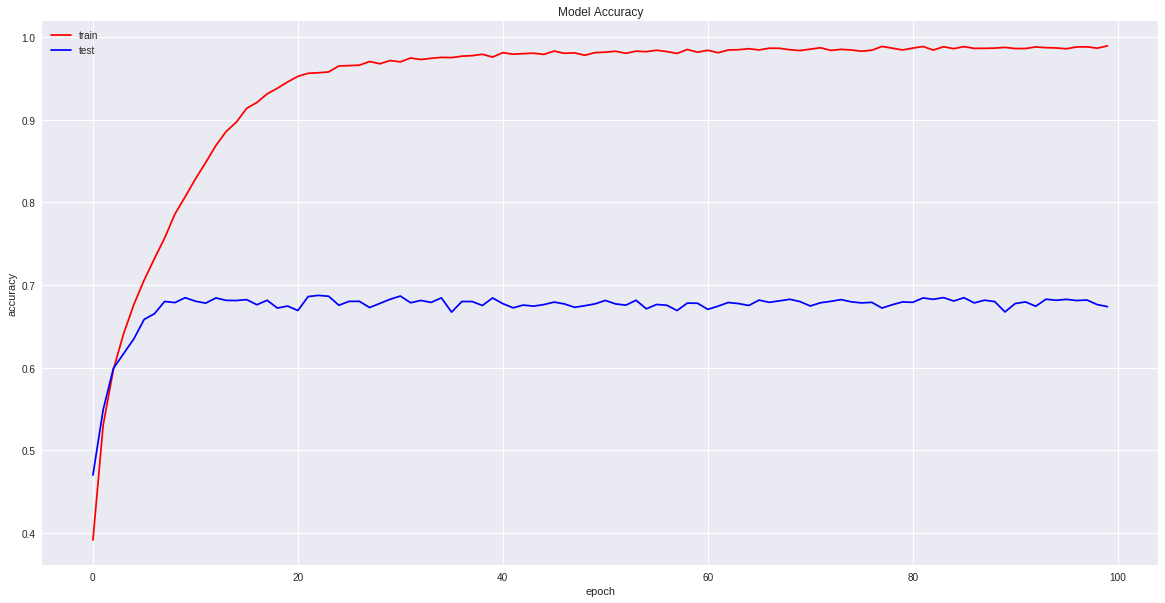

In [12]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


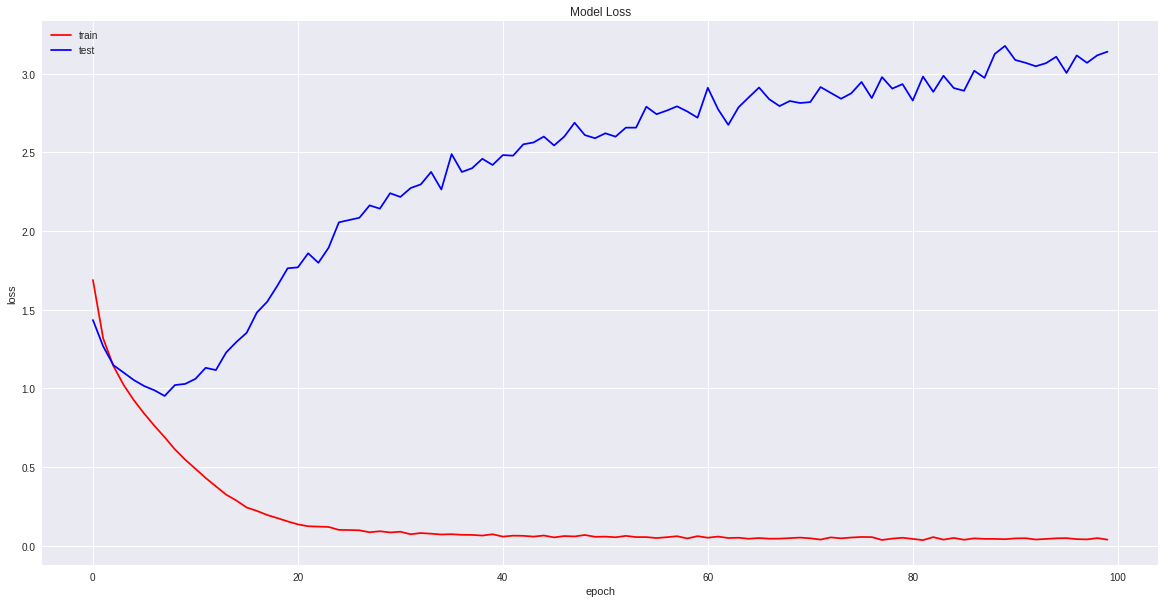

In [13]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()